<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/Algos_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 


link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

         DATE  MAX_TEMPERATURE_C  ...  DEWPOINT_MAX_C  WINDTEMP_MAX_C
0  2018-01-01                 12  ...               8               7
1  2018-01-02                 13  ...              12               6
2  2018-01-03                 15  ...              13               7
3  2018-01-04                 14  ...              12              10
4  2018-01-05                 12  ...              10               7

[5 rows x 15 columns]
         date  WEATHER_CODE_EVENING  TOTAL_SNOW_MM  UV_INDEX  SUNHOUR OPINION
0  2018-01-01                   113              0         3      5.1     bad
1  2018-03-12                   119              0         2      8.8     bad
2  2018-03-09                   116              0         3     10.2     bad
3  2018-10-07                   122              0         1      5.6     bad
4  2018-06-18                   119              0         1     12.9     bad


# Classification challenge

Your goal are :
- to merge both 2018 DataFrames
- to train-test split the new 2018 DataFrame
- to train 3 differents Machine Learning algorithms (KNN, logistic regression and decision tree) with "opinion" as target
- to try different parameters
- to find the best accuracy score (on the test set of course)
- to fill the missing values in the "opinion" columns whith your best model
- to explain what is the "rules" used by your model to predict the opinion.

You can help yourself with charts if you want.

In [ ]:
# Your code here :

# to merge both 2018 DataFrames
df2018 = pd.merge(df_main,df_opinion,how='left', left_on='DATE',right_on='date')
df2018 = df2018.dropna()
df2018['DATE'] = pd.to_datetime(df2018['DATE'])
df2018.head()


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad


In [ ]:
var_corr = ['MIN_TEMPERATURE_C','TEMPERATURE_MORNING_C','TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C', 'HEATINDEX_MAX_C', 'DEWPOINT_MAX_C','WINDTEMP_MAX_C','SUNHOUR']

X = df2018[var_corr]
y = df2018['OPINION']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

### to train 3 differents Machine Learning algorithms (KNN, logistic regression and decision tree)

In [ ]:
#method 1 - with KNN

model = KNeighborsClassifier(n_neighbors=3)
model_training = model.fit(X, y)

print(f"The accuracy score for training set: {round(model_training.score(X_train, y_train),3)}")
print(f"The accuracy score  for test set: {round(model_training.score(X_test, y_test),3)}")


The accuracy score for training set: 0.843
The accuracy score  for test set: 0.872


In [ ]:
#method 2 - with LogisticRegression

lr_model = LogisticRegression(max_iter=150).fit(X_train, y_train)

print(f"The accuracy score for training set: {round(lr_model.score(X_train, y_train),3)}")
print(f"The accuracy score  for test set: {round(lr_model.score(X_test, y_test),3)}")

The accuracy score for training set: 0.741
The accuracy score  for test set: 0.709


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# method 3 - Decision tree

dtree = DecisionTreeClassifier(random_state=42, max_depth=5)
dtree_fit = dtree.fit(X_train, y_train)

print(f"The score for training set: {round(dtree_fit.score(X_train, y_train),3)}")
print(f"The score  for test set: {round(dtree_fit.score(X_test, y_test),3)}")


The score for training set: 0.867
The score  for test set: 0.756


Avec les 3 algorythmes de ML, le meilleur score est celui du *KNN*<br/>
Les paramètres ont aussi été modifié (n_neighbords, max iter pour la regression logistique ou bien le random state et le max_depth pour le decision tree.

In [ ]:
# Fill the missing values in the "opinion" columns whith your best model and explain what is the "rules" used by your model to predict the opinion.

opinion_predict = model_training.predict(X_train)
opinion_predict

array(['very bad', 'not good not bad', 'not good not bad', 'good', 'bad',
       'very bad', 'not good not bad', 'good', 'good', 'very good', 'bad',
       'bad', 'very bad', 'very bad', 'bad', 'not good not bad',
       'not good not bad', 'very bad', 'very bad', 'good', 'very good',
       'good', 'bad', 'bad', 'very bad', 'not good not bad', 'good',
       'bad', 'very bad', 'good', 'good', 'bad', 'very bad', 'bad', 'bad',
       'very bad', 'very bad', 'good', 'very bad', 'very bad', 'good',
       'very bad', 'good', 'very bad', 'good', 'very good', 'good',
       'good', 'not good not bad', 'bad', 'good', 'not good not bad',
       'bad', 'not good not bad', 'good', 'very bad', 'bad', 'very bad',
       'not good not bad', 'not good not bad', 'bad', 'good', 'good',
       'good', 'good', 'good', 'very bad', 'not good not bad', 'good',
       'bad', 'bad', 'not good not bad', 'not good not bad', 'good',
       'very good', 'good', 'good', 'very bad', 'not good not bad',
       'no

In [ ]:
df2018['opinion_predict'] = pd.DataFrame(opinion_predict)

In [ ]:
y_train.value_counts()

good                70
bad                 62
very bad            58
not good not bad    49
very good           16
Name: OPINION, dtype: int64

In [ ]:
#confusion matrix

cm = confusion_matrix(y_train, opinion_predict)
cm

array([[52,  1,  8,  1,  0],
       [ 1, 62,  4,  0,  3],
       [ 3,  9, 36,  0,  1],
       [ 2,  0,  2, 54,  0],
       [ 0,  5,  0,  0, 11]])

In [ ]:
# Pour obtenir la version normalisée, nous divisons chaque élément de ligne par la somme de la ligne entière.
# Étant donné que chaque ligne représente le nombre total de valeurs réelles pour chaque étiquette de classe, la matrice normalisée finale nous montrera le pourcentage,
# c'est-à-dire. parmi toutes les vraies étiquettes pour une classe particulière, quelle était la prédiction en % de chaque classe faite par notre modèle pour cette vraie étiquette spécifique.

cm_normalized = cm.astype('float') / cm.sum(axis=1)
cm_normalized

array([[0.83870968, 0.01428571, 0.16326531, 0.01724138, 0.        ],
       [0.01612903, 0.88571429, 0.08163265, 0.        , 0.1875    ],
       [0.0483871 , 0.12857143, 0.73469388, 0.        , 0.0625    ],
       [0.03225806, 0.        , 0.04081633, 0.93103448, 0.        ],
       [0.        , 0.07142857, 0.        , 0.        , 0.6875    ]])

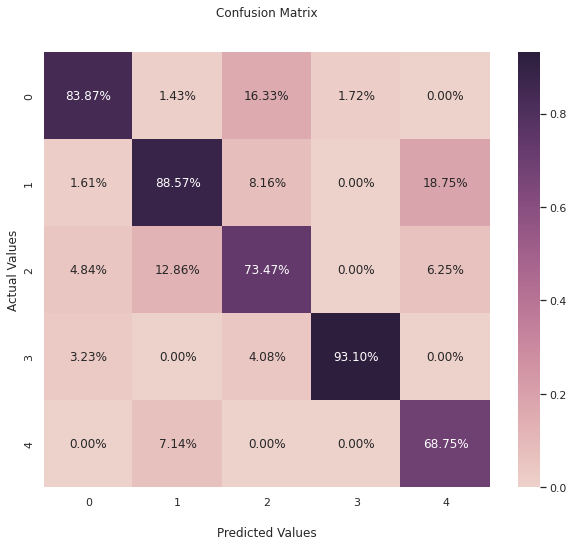

In [ ]:
ax = plt.figure(figsize=(10,8))
ax = sns.heatmap(cm_normalized, annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2%')

ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values')

plt.show()

In [ ]:
df2018.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,opinion_predict
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7,2018-01-01,113.0,0.0,3.0,5.1,bad,very bad
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6,2018-01-02,122.0,0.0,3.0,3.3,bad,bad
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7,2018-01-03,122.0,0.0,3.0,3.3,bad,not good not bad
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10,2018-01-04,116.0,0.0,3.0,3.3,bad,very bad
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7,2018-01-05,116.0,0.0,3.0,6.9,bad,bad


L'algorithme k-Nearest Neighbours (abrégé en k-NN ou la méthode KNN) est un type d'algorithme de "machine learning supervisé".<br/>
k fait référence au nombre de voisins les plus proches des données que nous essayons de classer, avec les variables des autres lignes en comparant avec celles donc la données est manquante, il trouvera les plus proches voisins.